# Modelo de regresión lineal

En esta sesión veremos cómo crear un modelo de regresión lineal univariado utilizando TensorFlow. Este modelo es el más sencillo utilizado en los modelos de aprendizaje automático, ya que es parte del modelo implementado por cada neurona de una red neuronal artificial. 

Una representación gráfica de este modelo es la siguiente:

![Modelo de regresión lineal](https://miro.medium.com/max/700/1*rptqFUQTMiruWZWKm-WMqQ.png)  
*Fuente*: [Single Neuron Training](https://towardsdatascience.com/single-neuron-training-3fc7f84d67d)

Para simplificar, nosotros ajustaremos un modelo univariado como el siguiente: 
$$\hat{y} = wx+b$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

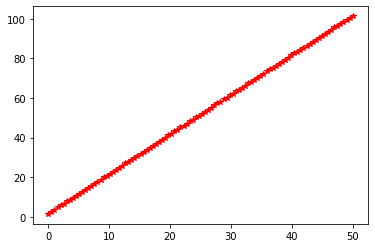

In [ ]:
X_train = np.linspace(0, 50, 100)
# DGP : Proceso real de generación de datos 
Y_train = 2*X_train + 1.5 + 0.15*np.random.randn(100)

plt.plot(X_train, Y_train, 'r*')

In [ ]:
X_train

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

In [ ]:
X_train.shape

(100,)

In [ ]:
X_train = np.reshape(X_train, (100, 1))
Y_train = np.reshape(Y_train, (100, 1))
X_train.shape, Y_train.shape

((100, 1), (100, 1))

## Función de costo

Queremos obtener los parámetros $w$ y $b$, tal que la función de pérdida cuadrática tenga el valor mínimo posible: 

$$ \text{Función de costo}(w,b) = \frac{1}{2N}\sum_{i=1}^{N} (y^{(i)} - wx^{(i)} -b)^2 $$

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__ 

TensorFlow 1.x selected.


'1.15.2'

In [ ]:
tf.reset_default_graph()

In [ ]:
X = tf.placeholder(tf.float32, shape=(None, 1))
Y = tf.placeholder(tf.float32, shape=(None, 1))
X, Y

(<tf.Tensor 'Placeholder:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=(?, 1) dtype=float32>)

In [ ]:
# [] indica que el shape es [], variables son escalares
W = tf.Variable(tf.random.truncated_normal([]))
b = tf.Variable(tf.random.truncated_normal([]))
W, b

(<tf.Variable 'Variable:0' shape=() dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=float32_ref>)

In [ ]:
# Pronóstico del modelo de regresión lineal
Yhat = W*X + b
Yhat

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

In [ ]:
fCosto = tf.reduce_mean(tf.pow(Y - Yhat, 2)) / 2
fCosto

<tf.Tensor 'truediv:0' shape=() dtype=float32>

In [ ]:
minimizer = tf.train.AdamOptimizer(0.001).minimize(fCosto)
minimizer

<tf.Operation 'Adam' type=NoOp>

In [ ]:
init = tf.global_variables_initializer()
init

<tf.Operation 'init' type=NoOp>

In [ ]:
# Vamos a obtener el costo actual
with tf.Session() as sess: 
    sess.run(init)
    costo = sess.run(fCosto, feed_dict={X:X_train, Y:Y_train})
    print("El costo actual es: ", costo)

El costo actual es:  1030.0671


In [ ]:
# Minimizar el costo
epochs = 10000

with tf.Session() as sess: 
    sess.run(init)

    for i in range(epochs): 
        # Ejecutar un paso de gradiente en descenso
        # Y obtener el costo a la vez
        sess.run(minimizer, feed_dict={X:X_train, Y:Y_train})

        # Obtener valores de los parámetros
        if i % 100 == 0:
            w_coef, b_coef, costo = sess.run([W, b, fCosto], feed_dict={X:X_train, Y:Y_train})
            print("Iteración: %d,\tCosto = %0.4f,\tW = %0.4f, \tb = %0.4f" % (i, costo, w_coef, b_coef))

w_coef, b_coef

Iteración: 0,	Costo = 1229.8643,	W = 0.3377, 	b = -0.2231
Iteración: 100,	Costo = 1087.9432,	W = 0.4366, 	b = -0.1241
Iteración: 200,	Costo = 958.5429,	W = 0.5327, 	b = -0.0281
Iteración: 300,	Costo = 841.0118,	W = 0.6257, 	b = 0.0649
Iteración: 400,	Costo = 734.6067,	W = 0.7156, 	b = 0.1549
Iteración: 500,	Costo = 638.6135,	W = 0.8026, 	b = 0.2418
Iteración: 600,	Costo = 552.3436,	W = 0.8865, 	b = 0.3258
Iteración: 700,	Costo = 475.1340,	W = 0.9674, 	b = 0.4067
Iteración: 800,	Costo = 406.3438,	W = 1.0452, 	b = 0.4845
Iteración: 900,	Costo = 345.3546,	W = 1.1198, 	b = 0.5592
Iteración: 1000,	Costo = 291.5690,	W = 1.1914, 	b = 0.6308
Iteración: 1100,	Costo = 244.4092,	W = 1.2598, 	b = 0.6992
Iteración: 1200,	Costo = 203.3182,	W = 1.3250, 	b = 0.7645
Iteración: 1300,	Costo = 167.7579,	W = 1.3870, 	b = 0.8265
Iteración: 1400,	Costo = 137.2108,	W = 1.4458, 	b = 0.8853
Iteración: 1500,	Costo = 111.1797,	W = 1.5013, 	b = 0.9409
Iteración: 1600,	Costo = 89.1893,	W = 1.5535, 	b = 0.9931
Itera

(2.0006516, 1.4691461)